# **Association Analysis**<br>
## **1. Introduction and algorithm description**
   This notebook uses the real time itemset dataset to demonstrate the association rule mining algorithms below which are provided by the hana_ml.<br>
- **Apriori**<br>
- **AprioriLite**<br>    
- **FPGrowth**<br>
- **KORD**<br>
<br>
<br>
- **Apriori**<br>
Apriori is a classic predictive analysis algorithm for finding association rules used in association analysis. Association analysis uncovers the hidden patterns, correlations or casual structures among a set of items or objects. For example, association analysis enables you to understand what products and services customers tend to purchase at the same time. By analyzing the purchasing trends of your customers with association analysis, you can predict their future behavior.<br>

 **Prerequisites**<br>
The input data does not contain null value.<br>
There are no duplicated items in each transaction.<br>

  Apriori algorithm takes the itemset as an input parameter and generates the association rules based on the mini-support passed during model fitting.<br>
  
  <b>Apriori Property</b> - If an item set is frequent, then all its subset items will be frequent.<br>
  The item set is frequent if the support for the item set is more that support threshold.Before we execute the model we give the minimum support which actually filter's the further itemset to be processed
  
- **AprioriLite**<br>
  This is a light association rule mining algorithm to realize the Apriori algorithm. It only calculates two large item sets.
  
  **e.g. for Apriori** - 
   
  Suppose if we take mini support as 0.25 the further frequent itemset calcualtion
  
  
   
 
  
  
  
  
  


<b>Suppose we have below transaction data for association analysis - <br>
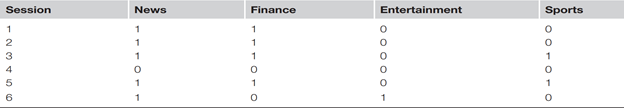

#### <b>After Applying frequent itemset analysis below itemset will be considered for rule generation considering mini support 0.25
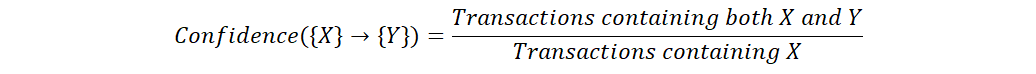
    
All the records are having mini support more than 0.25

- **Support** - how frequent an itemset in all the transactions<br>
               Support({X} -> {Y}) = Transaction containing both X & Y  /  Total Number of transactions <br>
               e.g. Support ({News} -> {Finance}) = 4 / 6 = .66 (66%)**
- Support indicates that there are 60% Chances that there is 66 % chances of this itemset to be frequent in total of 6 transactions<br>
- **Confidence**  - This is also one of the main factor in association rule analysis.<br>
  This measure defines the likeliness of occurrence of consequent on the cart given that the cart already has the antecedents.<br>
                 
                 Confidence({X} -> {Y}) = Transactions containing both X & Y  / Transactions containing X <br>
                 e.g. Confi({News} - > {Finance}) = 4 / 5 = .8 (80%)**
                   
**Lift** - This is also one of the most important factor in finding High Association rule among all the generated rules.<br>

Lift controls for the support (frequency) of consequent while calculating the conditional probability of occurrence of {Y} given {X}.<br> Lift is a very literal term given to this measure. 

                  Lift({X} -> {Y}) = ( (Transactions containing both X & Y) / (Transactions containing X) ) / 
                                        fraction of transaction containig Y
                  Lift({News} - > {Finance}) = (4/5) / 4 = 0.20(20%)
   
- A value of lift greater than 1 vouches for high association between {Y} and {X}.


- **FPGrowth**
   FP-Growth is an algorithm to find frequent patterns from transactions without generating a candidate itemset.

   In PAL, the FP-Growth algorithm is extended to find association rules in three steps:

   - Converts the transactions into a compressed frequent pattern tree (FP-Tree);<br>
   - Recursively finds frequent patterns from the FP-Tree;<br>
   - Generates association rules based on the frequent patterns found in Step 2.<br>
   FP-Growth with relational output is also supported.
   
    <b>Prerequisites</b>
     - The input data does not contain null value.
     - There are no duplicated items in each transaction.

## **2. Dataset**

we will analyze the store data for frequent pattern mining , this is real time data from from Kaggle for market basket analysis.
here is the data soruce - https://drive.google.com/file/d/1y5DYn0dGoSbC22xowBq2d4po6h1JxcTQ/view

A quick transaction previes of dataset

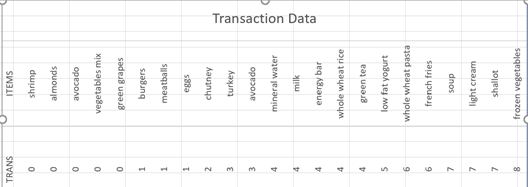

- **Attribute Information**<BR>
   CUSTOMER - Transaction<br>
   ITEM - Item for a transaction<br>


## **3. Data loading**<br>

### **Import Packages**
First, import packages needed in the data loading.

In [2]:
from hana_ml import dataframe
from data_load_utils import DataSets, Settings

## **Setup Connection**
In our case, the data is loaded into a table called "PAL_APRIORI_TRANS_TBL" in HANA from a csv file "apriori_item_data.csv". To do that, a connection to HANA is created and then passed to the data loader. To create a such connection, a config file, config/e2edata.ini is used to control the connection parameters. A sample section in the config file is shown below which includes HANA url, port, user and password information.<br>
<br>
###################<br>
[hana]<br>
url=host-url<br>
user=username<br>
passwd=userpassword<br>
port=3xx15<br>
<br>
###################<br>

In [131]:
url, port, user, pwd = Settings.load_config("../config/e2edata.ini")
# the connection
#print(url , port , user , pwd)
connection_context = dataframe.ConnectionContext(url, port, user, pwd)
print(connection_context.connection.isconnected())

True


  **Load Data**<br>
   Then, the function DataSets.load_apriori_data() is used to decide load or reload the data from scratch. If it is the first time to    load data, an exmaple of return message is shown below:
   
   #####################<br>
   
   ERROR:hana_ml.dataframe:Failed to get row count for the current Dataframe, (259, 'invalid table name:  Could not find table/view      PAL_APRIORI_TRANS_TBL in schema DM_PAL: line 1 col 37 (at pos 36)')
   Table PAL_APRIORI_TRANS_TBL doesn't exist in schema DM_PAL
   Creating table PAL_APRIORI_TRANS_TBL in schema DM_PAL ....
   Drop unsuccessful
   Creating table DM_PAL.PAL_APRIORI_TRANS_TBL
   Data Loaded:**100%**<br>
   <br>
   
   ######################<br>
   
   If the data is already loaded, there would be a return message "Table XXX exists and data exists".
   

In [4]:
data_tbl = DataSets.load_apriori_data(connection_context)

Table PAL_APRIORI_TRANS_TBL exists and data exists


#### **Create Dataframes**
Create a dataframe df from PAL_APRIORI_TRANS_TBL for the following steps.

In [5]:
df = connection_context.table(data_tbl)

In [7]:
df.collect().head(3)

,CUSTOMER,ITEM
0,565,almonds
1,341,eggs
2,1223,mineral water


In [171]:
df.dropna() ##Drop NAN if any

- Total number of records in dataset

In [66]:
df.count() #Total Number of records to be processed in Apriori Algorithm in SAP HANA ML#

6418

- Columns

In [9]:
display(df.columns)

['CUSTOMER', 'ITEM']

In [10]:
#Filter those items which comes under one transaction#
df.filter('CUSTOMER = 0').head(10).collect()

,CUSTOMER,ITEM
0,0,shrimp
1,0,avocado
2,0,vegetables mix
3,0,almonds
4,0,green grapes


In [11]:
#This is just a Data Analysis on the items , total number of transaction appearance for an item#
df.agg([('count' , 'ITEM' , 'TOTAL TRANSACTIONS')] , group_by='ITEM').head(10).collect()

,ITEM,TOTAL TRANSACTIONS
0,almonds,34
1,antioxydant juice,10
2,asparagus,4
3,avocado,69
4,babies food,4
5,bacon,16
6,barbecue sauce,11
7,black tea,13
8,blueberries,13
9,body spray,14


In [167]:
#Describe data in dataframe unique customers & unique items are displayed#
df.describe().collect()

,column,count,unique,nulls,mean,std,min,max,median,25_percent_cont,25_percent_disc,50_percent_cont,50_percent_disc,75_percent_cont,75_percent_disc
0,CUSTOMER,6418,2000,0,1005.381427,573.81055,0.0,1999.0,994.0,522.25,522.0,994.0,994.0,1510.75,1511.0
1,ITEM,6418,118,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Display distinct items 
- Count all the distinct items

In [174]:
df_distinct = df.distinct(cols=['CUSTOMER' , 'ITEM']).collect()
df_distinct

,CUSTOMER,ITEM
0,565,almonds
1,341,eggs
2,1223,mineral water
3,1342,escalope
4,1820,burgers
5,149,frozen vegetables
6,1294,turkey
7,46,clothes accessories
8,4,whole wheat rice
9,952,escalope


- Distinct table displays a huge similarity in all the transaction and items like user can see almonds has appered in 565 different transactions and total transaction 565 indicates that it hasn't always been bought as one item may be combination of one , two or three item together and we are going to find that soon.., it's equally applicable for all other different items as well in the list

In [166]:
df_distinct.count()   ##No Duplicate transaction

CUSTOMER    6418
ITEM        6418
dtype: int64

- Display the bar chart for first 20 items

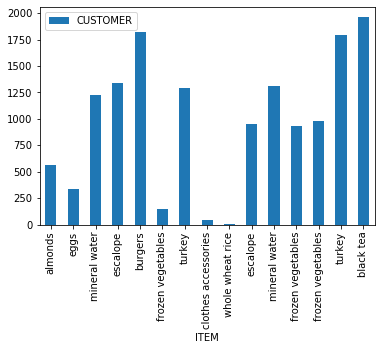

In [172]:
df_distinct_new = df_distinct.head(15)
df_distinct_new.plot(kind='bar' , x = 'ITEM' , y = 'CUSTOMER')

- Bar char is explaining the items and number of customers who bought that item , Such kind of a cross data analysis will be done through different Association analysis algorithms where we will get to know the items which are getting frequently picked 

- Data Types

In [173]:
print(df.dtypes())

[('CUSTOMER', 'INT', 10), ('ITEM', 'VARCHAR', 20)]


In [194]:
df_shrimp = df.filter('ITEM == "shrimp"')

### **Create dataframe by passing Pandas dataframe**

## **4. Data analysis application of assoication analysis**
In this section we are going to apply various association analysis methods for frequent pattern mining in data


### **4.1 Apriori**
Our goal is to find out frequent pattern mining from the data hence we are going to apply the Apriori method very first import the Apriori method from HANA ML

In [13]:
from hana_ml.algorithms.pal.association import Apriori

- **Apriori Signature**
   refre here for detailed signature of Apriori Method - 
   https://help.sap.com/viewer/2cfbc5cf2bc14f028cfbe2a2bba60a50/1.0.12/en-US/7a073d66173a4c1589ef5fbe5bb3120f.html
   
   Mini Support -0.001 as our transction volumne is very high so before passing this value please check total no of trans.<br>
   Mini Confidence - This is also depend on the total number of transactions into data (explained above)<br>
   Mini lift -  pass it atleast 1 as it is considered a high association value<br>
   **Note** - you can also manipulate with values of Apriori method & analyse the result 

In [14]:
ap = Apriori(conn_context=connection_context,
                 min_support=0.001,
                 min_confidence=0.5,
                 relational=False,
                 min_lift=1,
                 max_conseq=1,
                 max_len=5,
                 ubiquitous=1.0,
                 use_prefix_tree=False,
                 thread_ratio=0,
                 timeout=3600,
                 pmml_export='single-row')

- Calculate the execution time of Apriori method 
- Pass the data into method

**Method**<br>
fit(data[, transaction, item])<br>
Association rule mining based from the input data.

In [15]:
import time
start = time.time()
ap.fit(data=df)
end = time.time()
print(str(end-start) + " " +  "Secs")

1.7698895931243896 Secs


- Analyse the result 
- Let's analyse the first transaction from the result - <br>
  #### 0	pasta	shrimp	0.0115	0.676471	8.351489   <br>
  **Support** for item is 0.0115 - this indicates the frequency of item in the dataset as we are processing the dataset of recordcount 6418 hence the value of this field will be low always as it is calcuated by dividing the freuency of itemset appearing in all the transaction by total number of transaction.
  e.g for Shrimp total count = 162 and total transaction = 6418 Support Count  = 162/6418 = 0.025<br> 
  probability of having shrimp on the cart with the knwoledge that pasta is already in the cart is 0.7( round of .67) i.e. confidence<br>     which is absolutely a high confidence value & this can be considered a strong association rule.<br>
  result are displayed based on the paremeters passed in Apriori method for example mini confidence is 0.5 hence in result all the rules which are having min confidence greater or equal to 0.5 are considered<br>
  
 Let's analyse the next itemset - 
 #### 98	almonds&green tea	soup	0.0010	0.666667	11.594203
 here confidence is .66 & lift is 11.5(which is off-course greater than 1) this states that 66% of chances are that soup can be purchansed but customer if he/she is buying almonds & green tea.<br>

  result is displaying all the preceeding & subsequent item & subsequency chances in terms of Confidence & Lift hence purchasing     trends can be easily analyse but the Apriori method
  

In [17]:
ap.result_.head(100).collect()

,ANTECEDENT,CONSEQUENT,SUPPORT,CONFIDENCE,LIFT
0,pasta,shrimp,0.0115,0.676471,8.351489
1,water spray,shrimp,0.0010,0.666667,8.230453
2,chutney,soup,0.0010,0.666667,11.594203
3,chutney,spaghetti,0.0010,0.666667,3.703704
4,babies food,milk,0.0010,0.500000,4.115226
5,oatmeal,milk,0.0015,0.600000,4.938272
6,extra dark chocolate,mineral water,0.0040,0.666667,2.855103
7,chili,mineral water,0.0015,0.600000,2.569593
8,bramble,mineral water,0.0010,0.500000,2.141328
9,ketchup,spaghetti,0.0010,0.500000,2.777778


### Change Lift & Confidence 

In [18]:
ap = Apriori(conn_context=connection_context,
                 min_support=0.001,
                 min_confidence=0.7,
                 relational=False,
                 min_lift=5,
                 max_conseq=1,
                 max_len=5,
                 ubiquitous=1.0,
                 use_prefix_tree=False,
                 thread_ratio=0,
                 timeout=3600,
                 pmml_export='single-row')

**Method**<br>
fit(data[, transaction, item])<br>
Association rule mining based from the input data. 

In [19]:
ap.fit(data=df)

- Result Analysis - Mini Confidence & Lift value got changed before executing the apriori method , Mini confi = 0.7 & lift is 5 so we can see the result is having all the items which are having mostly the confidence as 1 and lift greater than 5 hence we can consider these as a high association rules


In [20]:
ap.result_.head(100).collect()

,ANTECEDENT,CONSEQUENT,SUPPORT,CONFIDENCE,LIFT
0,avocado&vegetables mix,green grapes,0.0010,1.000000,111.111111
1,avocado&pasta,shrimp,0.0010,1.000000,12.345679
2,vegetables mix&cookies,shrimp,0.0010,1.000000,12.345679
3,eggs&pasta,shrimp,0.0015,0.750000,9.259259
4,burgers&pasta,shrimp,0.0025,1.000000,12.345679
5,milk&pasta,shrimp,0.0020,1.000000,12.345679
6,green tea&pasta,shrimp,0.0010,1.000000,12.345679
7,mineral water&pasta,shrimp,0.0020,1.000000,12.345679
8,whole wheat pasta&chicken,shrimp,0.0015,1.000000,12.345679
9,whole wheat pasta&fresh tuna,shrimp,0.0010,1.000000,12.345679


#### **Apriori algorithm set up using relational logic:**

In [23]:
apr = Apriori(conn_context=connection_context,
                 min_support=0.001,
                 min_confidence=0.5,
                 relational=True,
                 min_lift=1,
                 max_conseq=1,
                 max_len=5,
                 ubiquitous=1.0,
                 use_prefix_tree=False,
                 thread_ratio=0,
                 timeout=3600,
                 pmml_export='single-row')

**Method**<br>
fit(data[, transaction, item])<br>
Association rule mining based from the input data.

In [24]:
apr.fit(data=df)

In [26]:
apr.antec_.head(5).collect()

,RULE_ID,ANTECEDENTITEM
0,0,pasta
1,1,water spray
2,2,chutney
3,3,chutney
4,4,babies food


In [27]:
apr.conseq_.head(5).collect()

,RULE_ID,CONSEQUENTITEM
0,0,shrimp
1,1,shrimp
2,2,soup
3,3,spaghetti
4,4,milk


In [28]:
apr.stats_.head(5).collect()

,RULE_ID,SUPPORT,CONFIDENCE,LIFT
0,0,0.0115,0.676471,8.351489
1,1,0.0010,0.666667,8.230453
2,2,0.0010,0.666667,11.594203
3,3,0.0010,0.666667,3.703704
4,4,0.0010,0.500000,4.115226


**Result Analysis**
  Same result is displayed in this relational as well but in form of 3 different table & using rule_id as key So one rule id is genreated for one item (if item is frequent) & first table indicates ANTECEDENTITEM (preceeding item) , second table CONSEQUENTITEM (subsequent item) & third table is displaying stats for that particular rule id containing support confidence & lift hence we can filter those records from stats table which are having high association

### **Attributes/Parameters of Apriori method**

**Attributes**<br>
result_
(DataFrame) Mined association rules and related statistics, structured as follows: - 1st column : antecedent(leading) items. - 2nd column : consequent(dependent) items. - 3rd column : support value. - 4th column : confidence value. - 5th column : lift value. Available only when relational is False.<br>
<br>model_
(DataFrame) Apriori model trained from the input data, structured as follows: - 1st column : model ID, - 2nd column : model content, i.e. Apriori model in PMML format.<br>
<br>antec_
(DataFrame) Antecdent items of mined association rules, structured as follows: - lst column : association rule ID, - 2nd column : antecedent items of the corresponding association rule. Available only when relational is True.<br>
<br>conseq_
(DataFrame) Consequent items of mined association rules, structured as follows: - 1st column : association rule ID, - 2nd column : consequent items of the corresponding association rule. Available only when relational is True.<br>
<br>stats_
(DataFrame) Statistis of the mined association rules, structured as follows: - 1st column : rule ID, - 2nd column : support value of the rule, - 3rd column : confidence value of the rule, - 4th column : lift value of the rule. Available only when relational is True.<br>

### **4.2 AprioriLite**

A light version of Apriori algorithm for assocication rule mining, where only two large item sets are calculated.

Set up parameters for light Apriori algorithm, ingest the input data, and check the result table: 

In [55]:
from hana_ml.algorithms.pal.association import AprioriLite ##Import AprioriLite version of HANA ML

In [56]:
apl = AprioriLite(conn_context=connection_context,
                      min_support=0.001,          ##Minimum Support Values 0.001
                      min_confidence=0.6,         ##Let's have it 0.5 atleast
                      subsample=1.0,
                      recalculate=False,
                      timeout=3600,
                      pmml_export='single-row')

**Method**<br>
fit(data[, transaction, item])<br>
Association rule mining based from the input data.

In [57]:
import time
start = time.time()
apl.fit(data=df)
end = time.time()
print(str(end-start) + " " +  "Secs")

1.6485424041748047 Secs


- **Result Analysis** <br> 
  Here result says the same as we did above in Apriori method the only difference it works only on Two large itemsets hence it is just displaying preceeding & Subsequent item with their stats , Support Confidence & lift.

In [58]:
apl.result_.head(1000).collect()

,ANTECEDENT,CONSEQUENT,SUPPORT,CONFIDENCE,LIFT
0,pasta,shrimp,0.0115,0.676471,8.351489
1,water spray,shrimp,0.0010,0.666667,8.230453
2,chutney,soup,0.0010,0.666667,11.594203
3,chutney,spaghetti,0.0010,0.666667,3.703704
4,oatmeal,milk,0.0015,0.600000,4.938272
5,extra dark chocolate,mineral water,0.0040,0.666667,2.855103
6,chili,mineral water,0.0015,0.600000,2.569593
7,babies food,chocolate,0.0015,0.750000,4.885993


### **4.3 FPGrowth**

In [59]:
from hana_ml.algorithms.pal.association import FPGrowth

In [88]:
fpg = FPGrowth(conn_context=connection_context,
                   min_support=0.0001,
                   min_confidence=0.5,
                   relational=False,
                   min_lift=1.0,
                   max_conseq=1,
                   max_len=5,
                   ubiquitous=1.0,
                   thread_ratio=0,
                   timeout=3600)

In [89]:
import time
start = time.time()
fpg.fit(data=df)
end = time.time()
print(str(end-start) + " " +  "Secs")

2.5169618129730225 Secs


- FPGrowth method workds on Divide & Conquer Approach & Faster than Apriori Algorithm
- This builds FP tree using for finding the frequent itemset 
- Apriori utilize a level-wise approach where it will generate patterns containing 1 items, then 2 items, 3 items, etc.
- **Result Analysis**
  Decrease the support count tells you that the frequency of item in total transaction is very low So if someone wants to do some   analysis on those then it is fine else we can consider only those items which are frequent enough for example consider those items  only which transacts 50 times in total of 10000 records then we can pass consider mini support count 0.005

In [90]:
fpg.result_.collect()

,ANTECEDENT,CONSEQUENT,SUPPORT,CONFIDENCE,LIFT
0,extra dark chocolate,mineral water,0.0040,0.666667,2.855103
1,chili,mineral water,0.0015,0.600000,2.569593
2,bramble,mineral water,0.0010,0.500000,2.141328
3,napkins,mineral water,0.0005,1.000000,4.282655
4,ketchup,spaghetti,0.0010,0.500000,2.777778
5,chutney,spaghetti,0.0010,0.666667,3.703704
6,napkins,spaghetti,0.0005,1.000000,5.555556
7,babies food,chocolate,0.0015,0.750000,4.885993
8,napkins,chocolate,0.0005,1.000000,6.514658
9,oatmeal,milk,0.0015,0.600000,4.938272


- Let's increase the support count & re-evaluate the method 

In [91]:
fpg = FPGrowth(conn_context=connection_context,
                   min_support=0.005,
                   min_confidence=0.6,
                   relational=False,
                   min_lift=1.0,
                   max_conseq=1,
                   max_len=5,
                   ubiquitous=1.0,
                   thread_ratio=0,
                   timeout=3600)

In [92]:
import time
start = time.time()
fpg.fit(data=df)
end = time.time()
print(str(end-start) + " " +  "Secs")

1.7987818717956543 Secs


In [93]:
fpg.result_.collect()

,ANTECEDENT,CONSEQUENT,SUPPORT,CONFIDENCE,LIFT
0,pasta,shrimp,0.0115,0.676471,8.351489
1,spaghetti&soup,mineral water,0.0070,0.608696,2.606834
2,frozen vegetables&soup,mineral water,0.0050,0.714286,3.059039


- Support for first record is 0.0115 it clearly statest that around 73 times this transaction has appeared hence we can surely say that if someone is purchasing pasta then 67% chances are that they will also buy shrimp as well
- from result displayed above can easily be considered as high Association rules as it contains a good support , confidence & lift   So from all the mentioned techniques we can manipulate the parameters Support , Confidence & Lift & analyse the different result for Market-Basket Analysis as all the three parameters play a important rule in execution of method 

### FPGrowth algorithm set up using relational logic:

In [100]:
fpgr = FPGrowth(conn_context=connection_context,
                   min_support=0.001,
                   min_confidence=0.6,
                   relational=True,
                   min_lift=1.0,
                   max_conseq=1,
                   max_len=5,
                   ubiquitous=1.0,
                   thread_ratio=0,
                   timeout=3600)

In [101]:
import time
start = time.time()
fpgr.fit(data=df)
end = time.time()
print(str(end-start) + " " +  "Secs")

1.99428391456604 Secs


- Again mining association rules using FPGrowth algorithm for the input data, and check the resulting tables:

- No of frequent precedding items with rule id as key

In [103]:
fpgr.antec_.collect()

,RULE_ID,ANTECEDENTITEM
0,0,extra dark chocolate
1,1,chili
2,2,chutney
3,3,babies food
4,4,oatmeal
5,5,pasta
6,6,water spray
7,7,chutney
8,8,spaghetti
9,8,soup


- No of subsequent items hvaing rule ID as key & satisfying the criteria we passed during FRGrowth method call
- Joining of these two tables based on the rule id can result all the antecedent & consequent items & rules can be considered as strong association rules

In [104]:
fpgr.conseq_.collect()

,RULE_ID,CONSEQUENTITEM
0,0,mineral water
1,1,mineral water
2,2,spaghetti
3,3,chocolate
4,4,milk
5,5,shrimp
6,6,shrimp
7,7,soup
8,8,mineral water
9,9,mineral water


In [105]:
fpgr.stats_.collect()

,RULE_ID,SUPPORT,CONFIDENCE,LIFT
0,0,0.0040,0.666667,2.855103
1,1,0.0015,0.600000,2.569593
2,2,0.0010,0.666667,3.703704
3,3,0.0015,0.750000,4.885993
4,4,0.0015,0.600000,4.938272
5,5,0.0115,0.676471,8.351489
6,6,0.0010,0.666667,8.230453
7,7,0.0010,0.666667,11.594203
8,8,0.0070,0.608696,2.606834
9,9,0.0015,0.600000,2.569593


- Here stats clearly depicts that all the rules which are having strong association have been displayed for example the Support , Confidence & Lift for rule ID - 0 is high enough to be considered.
- If user wants to further these result then filter on the Rules can be apllied after the result display 

In [115]:
fpgr.stats_.collect()

,RULE_ID,SUPPORT,CONFIDENCE,LIFT
0,0,0.0040,0.666667,2.855103
1,1,0.0015,0.600000,2.569593
2,2,0.0010,0.666667,3.703704
3,3,0.0015,0.750000,4.885993
4,4,0.0015,0.600000,4.938272
5,5,0.0115,0.676471,8.351489
6,6,0.0010,0.666667,8.230453
7,7,0.0010,0.666667,11.594203
8,8,0.0070,0.608696,2.606834
9,9,0.0015,0.600000,2.569593


- Filter result as required , it is just displaying on those records which are having lift greater than 5

In [114]:
fpgr.stats_.filter('LIFT > 5').collect()

,RULE_ID,SUPPORT,CONFIDENCE,LIFT
0,5,0.0115,0.676471,8.351489
1,6,0.0010,0.666667,8.230453
2,7,0.0010,0.666667,11.594203
3,20,0.0010,1.000000,6.451613
4,45,0.0020,1.000000,12.345679
5,51,0.0010,0.666667,10.178117
6,53,0.0010,0.666667,10.416667
7,57,0.0010,0.666667,10.928962
8,66,0.0010,0.666667,11.594203
9,72,0.0010,0.666667,12.012012


### **4.4 KORD**
- K-optimal rule discovery (KORD) follows the idea of generating association rules with respect to a well-defined measure, instead of first finding all frequent itemsets and then generating all possible rules.<br>
- Import KORD algorithms from HANA ML package

In [116]:
from hana_ml.algorithms.pal.association import KORD

- Set up a KORD instance:

In [126]:
krd =  KORD(conn_context=connection_context,
                k=50,
                measure='lift',
                min_support=0.001,
                min_confidence=0.5,
                epsilon=0.1,
                use_epsilon=False)

In [127]:
start = time.time()
krd.fit(data=df , transaction='CUSTOMER' , item='ITEM')
end = time.time()
print(str(end-start) + " " +  "Secs")

34.47829747200012 Secs


- **Result Analysis**
 - KORD display result in the form of 3 different table first contains all the preceeding items(ANTECEDENT) which satisfies the criteria we passed above for example mini confidcence & support<br>
 - Second table represents CONSEQUENT items , items which have followers in first table & all the tables containing the relations parameters as RULE_ID , RULE_ID can be used to join the tables if user wants any common value from data<br>
 - Third table displays the stats which contains all the rules which are passed in KORD criteria for example all the filtered rule

In [128]:
krd.antec_.collect()

,RULE_ID,ANTECEDENT_RULE
0,0,avocado
1,0,vegetables mix
2,1,french fries
3,1,oil
4,2,soup
5,2,fresh tuna
6,3,green grapes
7,3,avocado
8,4,eggs
9,4,mineral water


- Frequent consequent items

In [129]:
krd.conseq_.collect()

,RULE_ID,CONSEQUENT_RULE
0,0,green grapes
1,1,avocado
2,2,avocado
3,3,vegetables mix
4,4,almonds
5,5,meatballs
6,6,meatballs
7,7,whole wheat rice
8,8,whole wheat rice
9,9,whole wheat rice


- KORD Stats for frequent association rule mining 

In [130]:
krd.stats_.collect()

,RULE_ID,SUPPORT,CONFIDENCE,LIFT,LEVERAGE,MEASURE
0,0,0.0010,1.000000,111.111111,0.000991,111.111111
1,1,0.0010,0.666667,19.323671,0.000948,19.323671
2,2,0.0010,1.000000,28.985507,0.000965,28.985507
3,3,0.0010,0.666667,44.444444,0.000978,44.444444
4,4,0.0010,1.000000,58.823529,0.000983,58.823529
5,5,0.0010,0.666667,33.333333,0.000970,33.333333
6,6,0.0010,0.500000,25.000000,0.000960,25.000000
7,7,0.0010,1.000000,25.316456,0.000960,25.316456
8,8,0.0010,1.000000,25.316456,0.000960,25.316456
9,9,0.0010,1.000000,25.316456,0.000960,25.316456


## *Note* - For detailed reading please follow the link - 
 *Apriori* -   https://help.sap.com/viewer/2cfbc5cf2bc14f028cfbe2a2bba60a50/1.0.12/en-US/7a073d66173a4c1589ef5fbe5bb3120f.html<br>
 *FPRGrowth* - https://help.sap.com/viewer/2cfbc5cf2bc14f028cfbe2a2bba60a50/1.0.12/en-US/9495128435164c2680f064b65fef3774.html<br>
 *KORD* -      https://help.sap.com/viewer/2cfbc5cf2bc14f028cfbe2a2bba60a50/1.0.12/en-US/598818b3d063482f917e7b9d2f684a4e.html<br>

## **Note - data format issue**
- if data format is not as the algorithm requires then below is sample code can be used to process the data & can convert it into the desired format 
 
df - > your dataframe which is taking csv file from your system , mention in signature if it has header , else ignore it<br> 
df = pd.read_csv(r"C:\Users\i339715\Desktop\HANA_ML\Apriori\grocery_data_new_2000.csv" ,header=None)<br> 
df = pd.read_csv(r"C:\Users\i339715\Desktop\HANA_ML\Apriori\apriori_50.csv" , sep='\t', header=None)<br>


**Save the file into datasets folder & upload this into SAP HANA**